 Implement a Convolutional Neural Network (CNN) from scratch using Keras.
 We will be using a model similar to VGG16 but with fewer layers.

 1. Load the CIFAR-10 Dataset
2. Dataset Preprocessing
3. Dataset and Training Configuration   Parameters
4. CNN Model Implementation in Keras
5. Adding Dropout **to** the Model
6. Saving and Loading Models
7. Model Evaluation
8. Conclusion

This notebook is based on the tutorial provided by OpenCV course

In [1]:
#importing the libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

2024-05-10 20:10:15.355554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 20:10:15.355646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 20:10:15.512614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
SEED_VALUE = 42

#fix seed to make training deterministic
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

LOADING THE CIFAR 10 DATASET

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


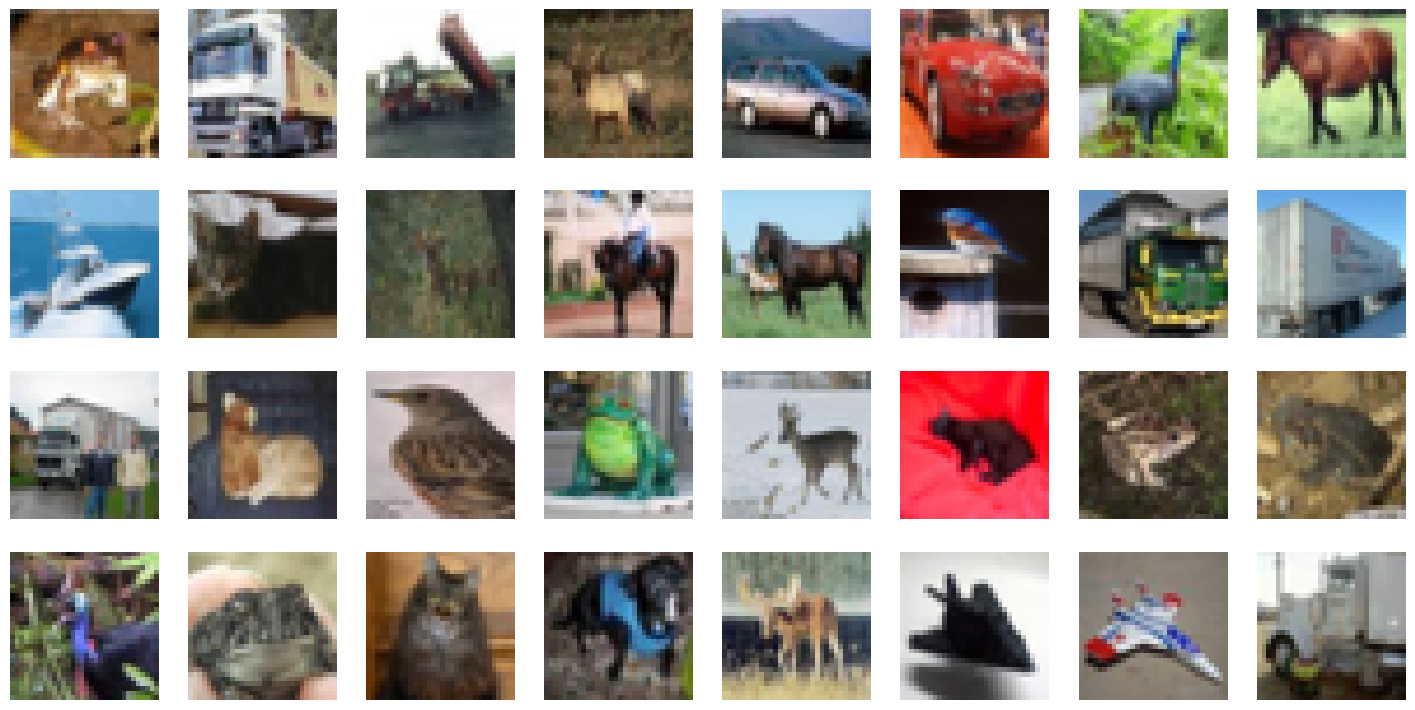

In [4]:
#Displaying the sample pictures from the dataset

plt.figure(figsize=(18,9))

num_rows = 4
num_cols = 8

#plot each of the images in the batch and the associated ground truth labels
for i in range(num_rows*num_cols):
  ax = plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(X_train[i,:,:])
  plt.axis("off")

DATASET PREPROCESSING

In [5]:
# We are going to normalize the image data to the range[0,1]. Very common when working with image data to help the model train more efficiently.
# We also convert the integer labels to one-hot encoded labels


#Normalize images to the range[0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

#Change the labels from integer to categorical data
print('Original (integer) label for the first training sample: ', y_train[0])

#convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])


Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Dataset and Training configuration Parameters

In [6]:
# We are going to make classes DatesetConfig and TrainingConfig using dataclasses modeule of python
# It basically creates data structures for configuration paramters, etc wo that we have to make changes in parameters only once

@dataclass(frozen=True)
class DatasetConfig:
  NUM_CLASSES: int = 10
  IMG_HEIGHT: int = 32
  IMG_WIDTH: int = 32
  NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
  EPOCHS: int = 31
  BATCH_SIZE: int = 256
  LEARNING_RATE : float = 0.001


CNN MODEL IMPLEMENTATION IN KERAS

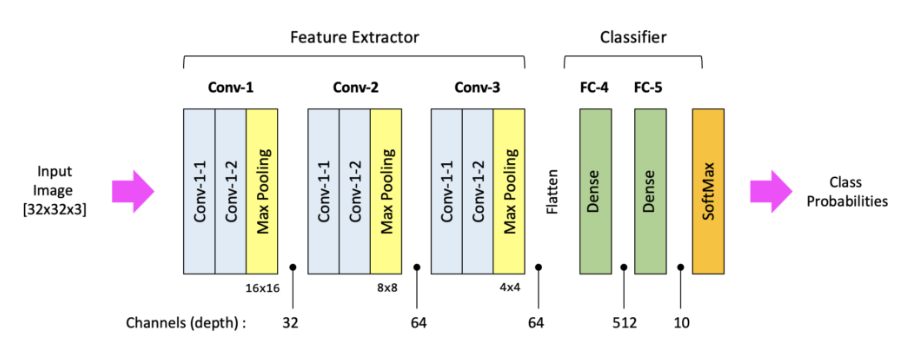

In [7]:
# 1) Build/define a network model using predefined layers in keras.
# 2) Compile the model with model.compile()
# 3) Train the model with model.fit()

def cnn_model(input_shape=(32,32,3)):

  model = Sequential()

  # Conv block 1: 32 filters, Maxpool
  model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu', input_shape= input_shape))
  model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Conv block 2 : 64 filters, MaxPool
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Conv block 3: 63 filters, Maxpool
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))


  #flattent the conv features

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [8]:
#create the model
model =cnn_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#compile the model
model.compile(optimizer='rmsprop',
              loss ='categorical_crossentropy',
              metrics =['accuracy'],)

In [10]:
# train the model
# we will now split the training dataset in to training and validation set using validation_split arg
# 30% of training dataset is reserved for validation.

history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs= TrainingConfig.EPOCHS,
                    verbose = 1,
                    validation_split = .3,)


Epoch 1/31
  8/137 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1130 - loss: 2.3018

I0000 00:00:1715371908.704522     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715371908.723695     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1671 - loss: 2.2356

W0000 00:00:1715371914.855351     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715371916.143980     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.1675 - loss: 2.2348 - val_accuracy: 0.2833 - val_loss: 1.9515
Epoch 2/31
  9/137 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3303 - loss: 1.8695

W0000 00:00:1715371918.068343     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3523 - loss: 1.7843 - val_accuracy: 0.3693 - val_loss: 1.7340
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4373 - loss: 1.5513 - val_accuracy: 0.4491 - val_loss: 1.5416
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4972 - loss: 1.3883 - val_accuracy: 0.5047 - val_loss: 1.3561
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5450 - loss: 1.2640 - val_accuracy: 0.5261 - val_loss: 1.3207
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5836 - loss: 1.1597 - val_accuracy: 0.5563 - val_loss: 1.2674
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6291 - loss: 1.0492 - val_accuracy: 0.4771 - val_loss: 1.5988
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6571 - loss: 0.9746 - val_accuracy: 0.6131 - val_loss: 1.1314
Epoch 9/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7002 - loss: 0.8533 - val_accuracy: 0.599

In [11]:
#plotting the results

def plot_results(metrics, title=None,ylabel=None,ylim=None,metric_name=None,color=None):
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not(isinstance(metric_name, list) or isinstance(metric_name,tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0,TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

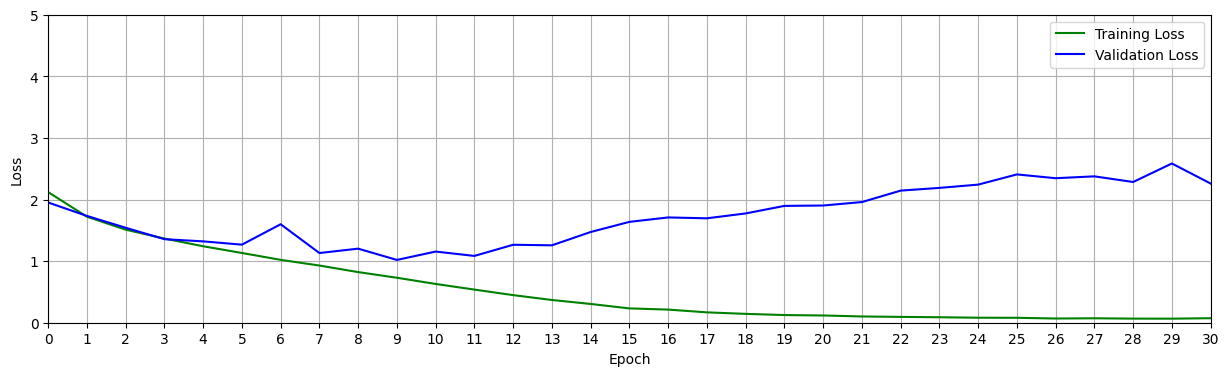

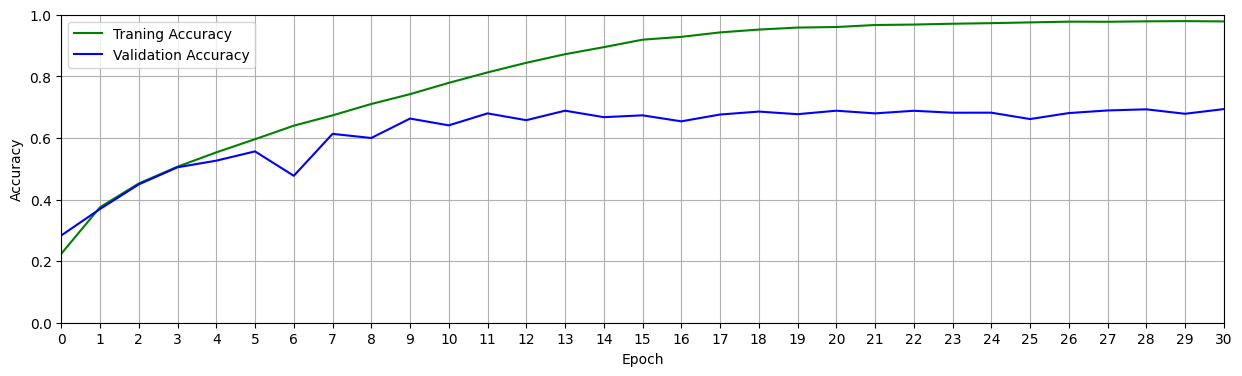

In [15]:
train_loss = history.history["loss"]
train_acc = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc = history.history["val_accuracy"]

plot_results([train_loss,valid_loss],
            ylabel="Loss",
            ylim=[0.0,5.0],
            metric_name=["Training Loss","Validation Loss"],
            color=["g","b"]);

plot_results([train_acc,valid_acc],
            ylabel="Accuracy",
            ylim=[0.0,1.0],
            metric_name=["Traning Accuracy","Validation Accuracy"],
            color=["g","b"])


The results reveal that the model is overfitting. 
The validation loss increases after about ten epochs of training while the training loss continues to decline. 
This means that the network learns how to model the training data well but does not generalize to unseen test data well. The accuracy plot shows a similar trend where the validation accuracy levels off after about ten epochs while the training accuracy continues to approach 100% as training progresses. 
This is a common problem when training neural networks and can occur for a number of reasons. One reason is that the model can fit the nuances of the training dataset, especially when the training dataset is small.

**DROPOUT**
One solution would be to include a Dropout to the model
Dropout is a regularization technique
Dropout acts as a layer in keras that randomly drops a percentage of neurons during the training process
It is usually used after the max pool layer so that the feature extraction is not affected. Dropout is also used after dense fully connected layers.

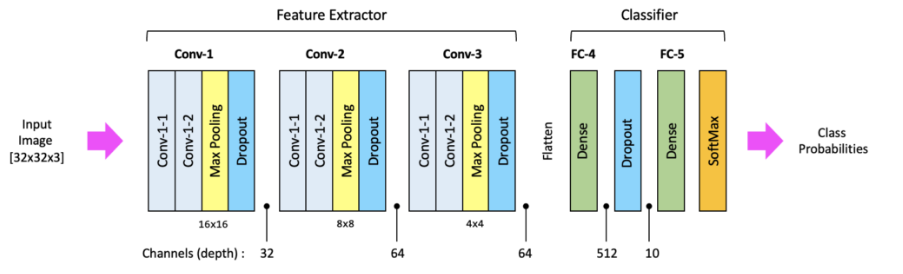

In [17]:
#defining the model with dropout

def cnn_model_dropout(input_shape=(32,32,3)):
    model = Sequential()
    
    #conv block1: 32 filters, Maxpool
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    #conv block2: 64 filters, Maxpool
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
     #conv block3: 64 filters, Maxpool
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    #flattening layer
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    
    return model

In [18]:
#create model
model_dropout = cnn_model_dropout()
model_dropout.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Compiling the model
model_dropout.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'],)

In [21]:
#Training the model with dropout
history = model_dropout.fit(X_train,
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=.3,
                   )

Epoch 1/31
  8/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1001 - loss: 2.3108

W0000 00:00:1715375007.309087     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1455 - loss: 2.2556

W0000 00:00:1715375015.132800     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715375016.239543     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.1458 - loss: 2.2549 - val_accuracy: 0.2643 - val_loss: 2.0564
Epoch 2/31
  7/137 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2950 - loss: 1.9654

W0000 00:00:1715375016.910242     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3115 - loss: 1.8970 - val_accuracy: 0.3326 - val_loss: 1.8342
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3785 - loss: 1.6896 - val_accuracy: 0.4312 - val_loss: 1.5435
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4386 - loss: 1.5295 - val_accuracy: 0.4512 - val_loss: 1.5499
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4834 - loss: 1.4187 - val_accuracy: 0.5067 - val_loss: 1.3828
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5254 - loss: 1.3129 - val_accuracy: 0.5203 - val_loss: 1.3350
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5611 - loss: 1.2270 - val_accuracy: 0.5729 - val_loss: 1.1721
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5848 - loss: 1.1635 - val_accuracy: 0.6121 - val_loss: 1.1052
Epoch 9/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6097 - loss: 1.0909 - val_accuracy: 0.596

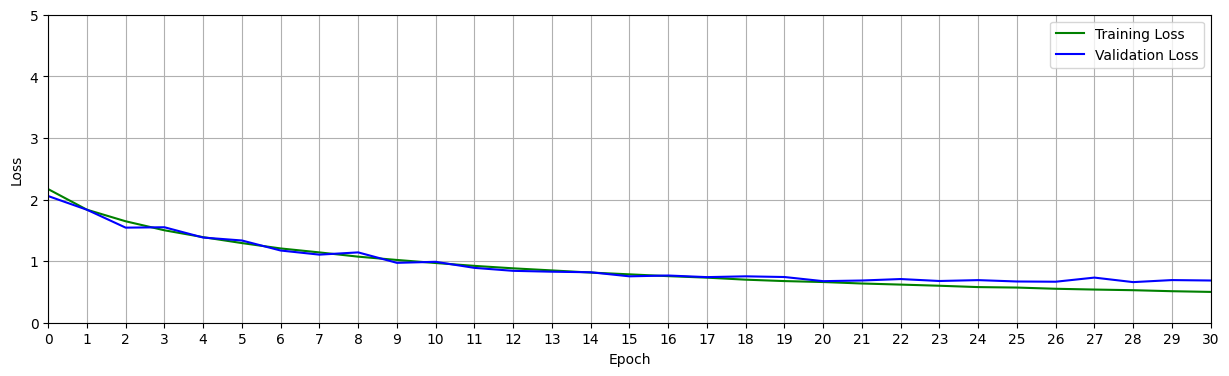

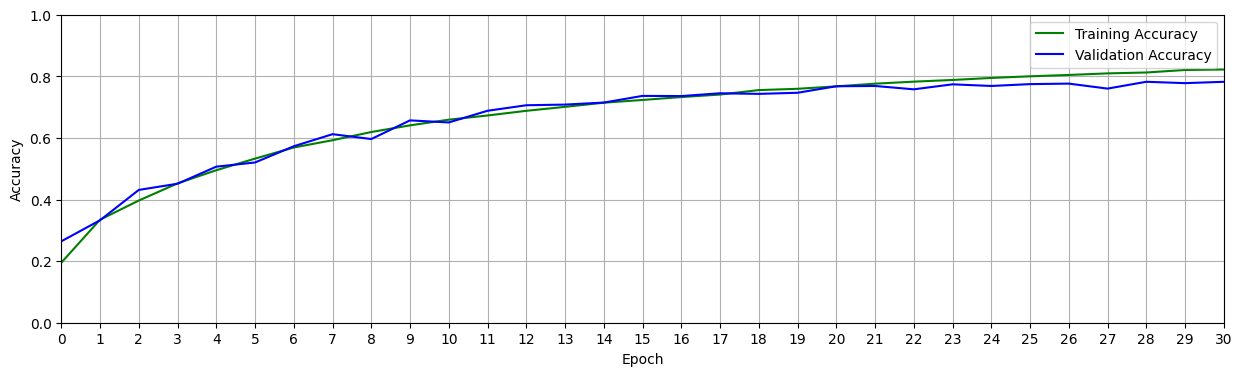

In [22]:
#plotting the results
train_loss = history.history["loss"]
train_acc = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc = history.history["val_accuracy"]

plot_results([train_loss,valid_loss],
            ylabel="Loss",
            ylim =[0.0,5.0],
            metric_name=["Training Loss","Validation Loss"],
            color=["g","b"]);

plot_results([train_acc,valid_acc],
            ylabel="Accuracy",
            ylim=[0.0,1.0],
            metric_name=["Training Accuracy","Validation Accuracy"],
            color=["g","b"])

WOW, BEAUTIFUL! 
As you can see, both the training and validation loss curves align closely. 
The Dropout regularization did work.

SAVING AND LOADING THE MODELS

In [25]:
#saving the model
model_dropout.save('model_dropout.h5')

In [26]:
#loading the model
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.h5')

In [27]:
#model evalutation

test_loss, test_acc = reloaded_model_dropout.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_acc*100: .3f}")

 87/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.6873

W0000 00:00:1715375912.955560     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7800 - loss: 0.7058


W0000 00:00:1715375914.559106     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy:  77.630


Making predictions on sample test images


In [32]:
def evaluate_model(dataset,model):
    class_name = ['airplane',
                 'automobile',
                 'bird',
                 'cat',
                 'deer',
                 'dog',
                 'frog',
                 'horse',
                 'ship',
                 'truck']
    num_rows = 3
    num_cols = 6
    
    #retrieve a number of images from the dataset
    data_batch = dataset[0:num_rows*num_cols]
    
    #get predictions
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    num_matches = 0
         
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
 
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
             
        title = str(class_name[truth_idx[0][0]]) + " : " + str(class_name[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
             
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
                 
        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction accuracy:  0.88


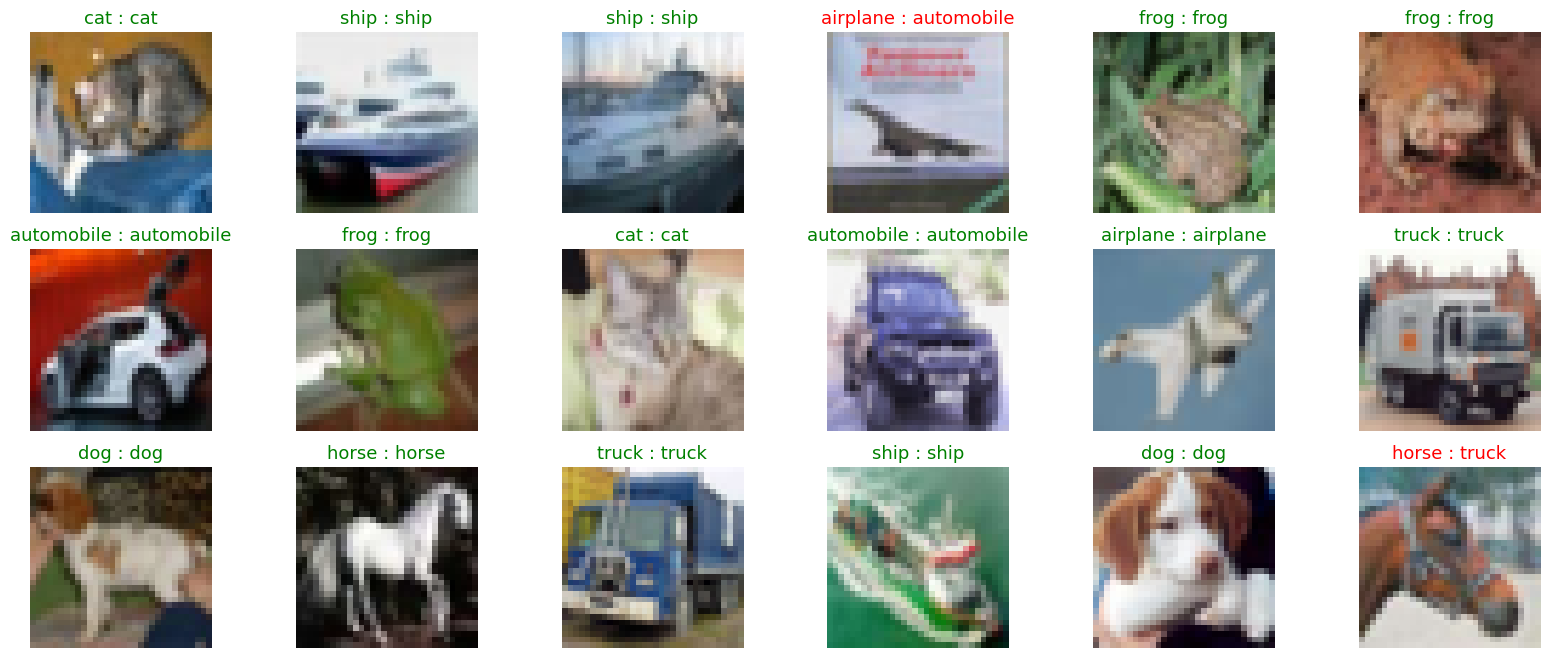

In [33]:
evaluate_model(X_test, reloaded_model_dropout)

CONFUSION MATRIX

In [34]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)
 
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

 97/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715377176.427248     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1715377177.216020     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


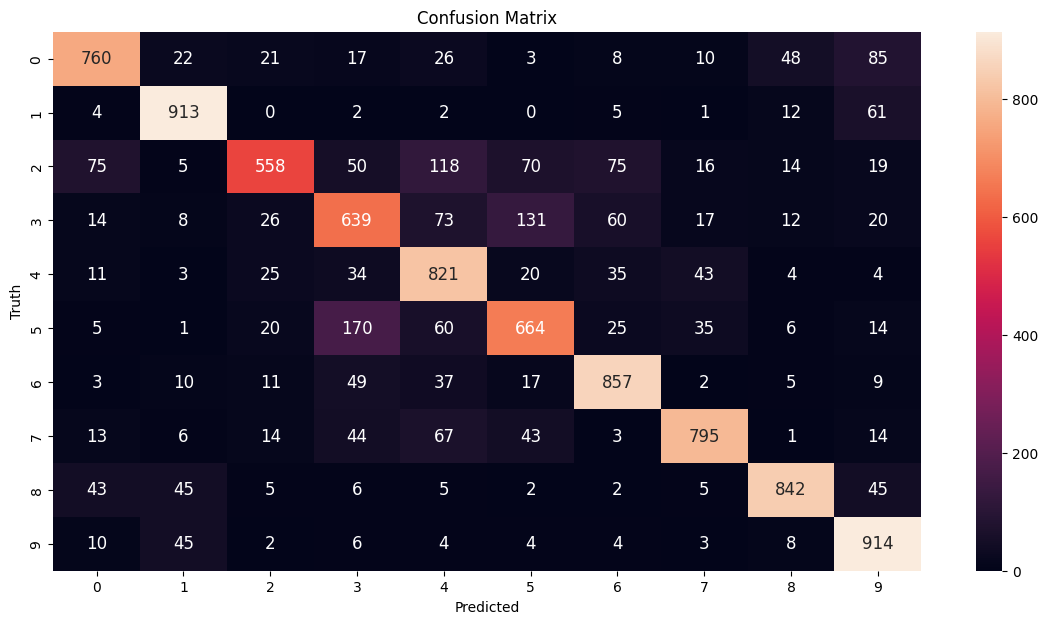

In [35]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)
 
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)
 
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

A confusion matrix is a content-rich representation of a model’s performance at the class level. It can be very informative to better understand where the model performs well and where it may have more difficulty. For example, a few things stand out right away. Two of the ten classes tend to be misclassified more than others: Dogs and Cat. More specifically, a large percentage of the time, the model confuses these two classes with each other. Let’s take a closer look. The ground truth label for a cat is 3, and the ground truth label for a dog is 5. Notice that when the input image is a cat (index 3), it is often most misclassified as a dog, with 176 misclassified samples. When the input image is a dog (index 5), the most misclassified examples are cats, with 117 samples.

Also, notice that the last row, which represents trucks, is most often confused with automobiles. So all of these observations make intuitive sense, given the similarity of the classes involved.